In [1]:
import pandas as pd
pass_data = pd.read_csv('AirQualityUCI.csv',  thousands='.', decimal=',', sep=';')
pass_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,180000.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,190000.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,200000.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,210000.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,220000.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Набор данных оценка качества воздуха содержит следующие атрибуты:

- Дата (ДД/ММ/ГГГГ)

- Время (ЧЧ.ММ.СС)

- (CO)Истинная почасовая усредненная концентрация углекислого газа в мг(м^3)

- PT08.S21 - Усредненый по часам отклик датчика

- NMHC - Истинная почасовая усредненная общая концентрация неметановых углеводородов в мкг/м^3

- Истинная почасовая усредненная концентрация бензола в мкг/м^3

- PT08.S2 -  Усредненный по часам отклик датчика

- Истинная почасовая усредненная концентрация оксида Азота 2 в мкг/м^3

- PT08.S3 - Усредненный по часам отклик датчика

- Истинная почасовая усредненная концентрация оксида Азота 4  в мкг/м^3

- PT08.S4 - Усредненный по часам отклик датчика

- PT08.S5 - Усредненный по часам отклик датчика 

- Температура в °C

In [53]:
print(pass_data.shape)
pass_data.drop_duplicates(inplace=True)
print(pass_data.shape)

(9357, 14)
(9346, 14)


numerical:  ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
categorial:  []


<AxesSubplot:>

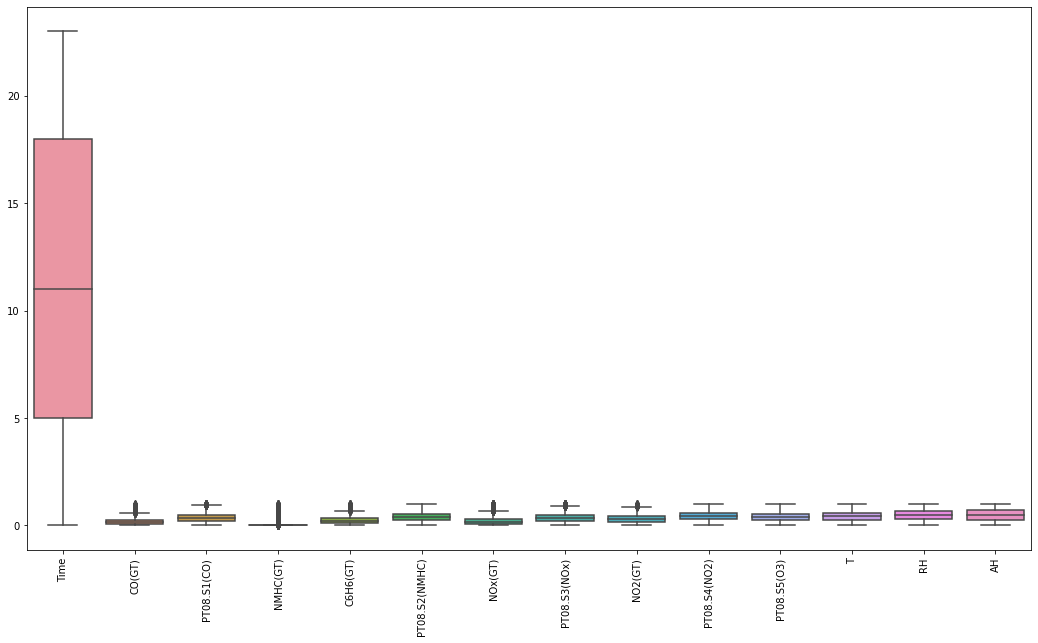

In [54]:
import seaborn as sns

import matplotlib.pyplot as plt

numerical_columns = [i for i in pass_data.columns[1:16] if pass_data[i].dtype.name != 'object']

categorial_columns = [i for i in pass_data.columns[1:16] if pass_data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)

print('categorial: ', categorial_columns)

fig = plt.figure(figsize=(18, 10))

plt.xticks(rotation='vertical')

#total_num = pass_data.drop(columns = 'Date', axis = 1)

sns.boxplot(data = total_num)

In [55]:
from sklearn import preprocessing

label=preprocessing.LabelEncoder()

total_num=pass_data.apply(label.fit_transform)

<AxesSubplot:>

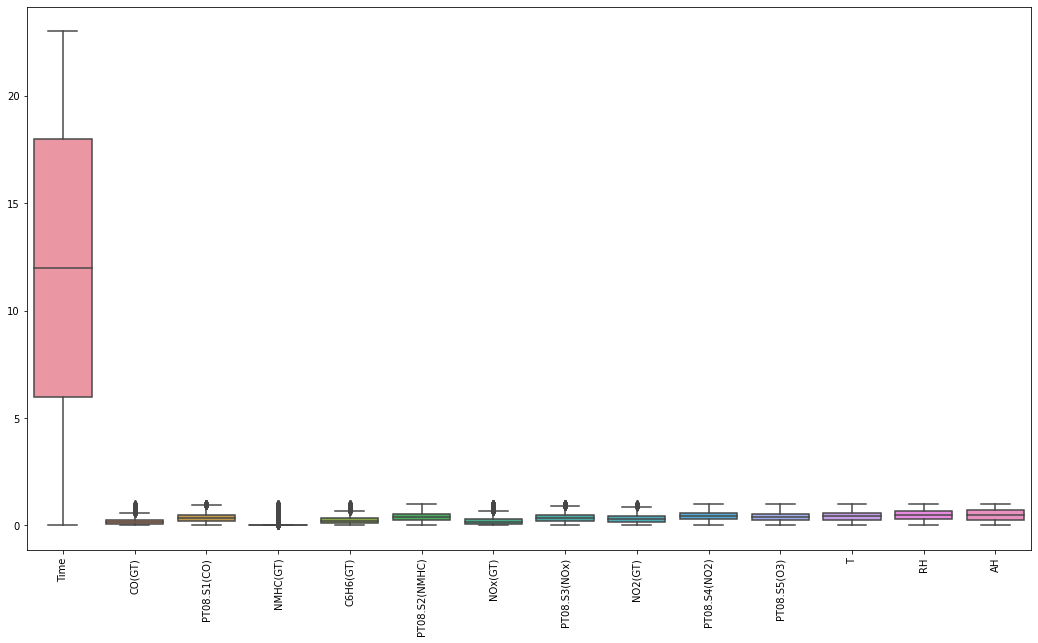

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = numerical_columns

total_num[columns] = scaler.fit_transform(total_num[columns])# обучение и преобразвоание данных

fig = plt.figure(figsize=(18, 10))

plt.xticks(rotation='vertical')

sns.boxplot(data = total_num)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Time,1.000000,0.074442,0.194823,0.049124,0.041851,0.281065,0.224189,-0.260946,0.218175,0.145706,0.196385,0.022727,-0.115024,-0.018996
CO(GT),0.074442,1.000000,0.033306,0.128017,-0.042998,0.022970,0.525169,-0.097680,0.669850,-0.082104,0.075035,-0.081127,-0.059601,-0.057959
PT08.S1(CO),0.194823,0.033306,1.000000,0.170153,0.850036,0.932331,0.274263,0.074291,0.146561,0.842835,0.891981,0.749948,0.740315,0.760232
NMHC(GT),0.049124,0.128017,0.170153,1.000000,0.036154,0.109669,-0.004927,0.048029,0.102863,0.162629,0.100697,-0.001706,0.006761,0.010953
C6H6(GT),0.041851,-0.042998,0.850036,0.036154,1.000000,0.764403,-0.009542,0.504365,-0.023051,0.771202,0.638020,0.970554,0.923018,0.984106
PT08.S2(NMHC),0.281065,0.022970,0.932331,0.109669,0.764403,1.000000,0.328258,-0.086302,0.170274,0.873178,0.909238,0.663980,0.579155,0.641067
NOx(GT),0.224189,0.525169,0.274263,-0.004927,-0.009542,0.328258,1.000000,-0.444330,0.816685,0.030047,0.459901,-0.148894,-0.061764,-0.105867
PT08.S3(NOx),-0.260946,-0.097680,0.074291,0.048029,0.504365,-0.086302,-0.444330,1.000000,-0.265771,0.111735,-0.220315,0.581812,0.567040,0.615982
NO2(GT),0.218175,0.669850,0.146561,0.102863,-0.023051,0.170274,0.816685,-0.265771,1.000000,-0.030611,0.248858,-0.097321,-0.093941,-0.073550
PT08.S4(NO2),0.145706,-0.082104,0.842835,0.162629,0.771202,0.873178,0.030047,0.111735,-0.030611,1.000000,0.721114,0.751163,0.634467,0.686678


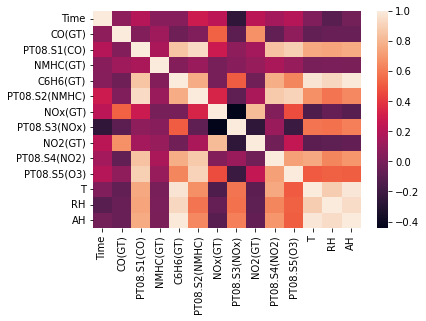

In [57]:
sns.heatmap(pass_data.corr())

pass_data.corr()

In [58]:
pass_data.count()

pass_data.shape

pass_data.dropna(axis=0,inplace=True)

In [59]:
categorical_attributes = [column for column in pass_data.columns if pass_data[column].dtype.name == 'object']

print(categorical_attributes)

pass_data = pass_data.drop(categorical_attributes, axis=1)

[]


In [60]:
#линейная регрессия без использования регуляризаторов

from sklearn import linear_model

reg = linear_model.LinearRegression()

x = pass_data.drop(['T'], axis=1)

y = pass_data['T']

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y) 
#разделение данных на случайные масивы с которыми мы рабртаем

In [62]:
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
reg.score(x_test,y_test)

0.994621801615789

In [64]:
reg.coef_

array([ 9.14116195e-07,  1.83073586e-03, -1.09254007e-03, -8.27719548e-03,
       -8.22025228e-01,  3.35411737e-03,  6.79007333e-03, -6.08836904e-03,
       -1.20076485e-02,  2.47196297e-02, -4.17538958e-03, -3.16869842e-01,
        2.18193387e+00])

In [65]:
y_pred = reg.predict(x_test)

print('predicted response:', y_pred, sep='\n')

predicted response:
[ 6.91206727 18.3185558  28.90682309 ...  7.98456897 10.19086736
 22.59491716]


In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Accuracy': abs(y_test-y_pred)})
df.head()

,Actual,Predicted,Accuracy
7273,7.2,6.912067,0.287933
1179,19.8,18.318556,1.481444
3617,27.6,28.906823,1.306823
8610,8.6,10.837075,2.237075
3560,21.9,19.888692,2.011308


In [67]:
import numpy
Acc = numpy.mean(abs(y_test-y_pred))
print ('Точность: ', Acc)

Точность:  2.4350965137166707


In [68]:
print('Сorrelation coefficient: %.3f' % df['Actual'].corr(df['Predicted'], method='pearson'))
print('Spearman correlation coefficient: %.3f' % df['Actual'].corr(df['Predicted'], method='spearman'))

Сorrelation coefficient: 0.997
Spearman correlation coefficient: 0.952


In [69]:
#линейная регрессия, LASSO регуляризатор;

from sklearn.linear_model import LassoCV

reg = linear_model.LassoCV()


In [70]:
reg.fit(x_train,y_train)

LassoCV()

In [71]:
reg.score(x_test,y_test)

0.9859113890400745

In [72]:
reg.coef_

array([ 1.24578536e-05,  0.00000000e+00, -0.00000000e+00, -1.33189702e-02,
        0.00000000e+00,  5.58573040e-03, -8.90583429e-03,  3.59600402e-03,
        1.07164905e-02,  2.06700431e-02, -9.09457899e-03, -4.87642302e-02,
        9.64821696e-01])

In [73]:
y_pred = reg.predict(x_test)

print('predicted response:', y_pred, sep='\n')

predicted response:
[13.89031347 17.51764722 26.93871199 ...  8.0971974  17.57385777
 22.48851352]


In [74]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Accuracy': abs(y_test-y_pred)})
df.head()

,Actual,Predicted,Accuracy
7273,7.2,13.890313,6.690313
1179,19.8,17.517647,2.282353
3617,27.6,26.938712,0.661288
8610,8.6,8.669026,0.069026
3560,21.9,21.229580,0.670420


In [75]:
Acc = numpy.mean(abs(y_test-y_pred))
print ('Точность: ', Acc)

Точность:  3.8494840104174486


In [76]:
print('Сorrelation coefficient: %.3f' % df['Actual'].corr(df['Predicted'], method='pearson'))
print('Spearman correlation coefficient: %.3f' % df['Actual'].corr(df['Predicted'], method='spearman'))

Сorrelation coefficient: 0.993
Spearman correlation coefficient: 0.859
